# Climate Change Data Analysis

---

## Introduction

This notebook explores climate change-related data from the World Bank. We will cluster countries based on various indicators and fit models to predict future trends.

---

## 1. Data Preprocessing

### 1.1 Load the Data


In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/climate-change.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Country Name,Country Code,Year,average_value_Access to electricity (% of population),average_value_Agricultural land (% of land area),average_value_Agricultural land (sq. km),"average_value_Agriculture, forestry, and fishing, value added (% of GDP)","average_value_Annual freshwater withdrawals, total (% of internal resources)","average_value_Annual freshwater withdrawals, total (billion cubic meters)",average_value_Arable land (% of land area),...,"average_value_School enrollment, primary and secondary (gross), gender parity index (GPI)",average_value_Terrestrial and marine protected areas (% of total territorial area),average_value_Terrestrial protected areas (% of total land area),average_value_Total greenhouse gas emissions (kt of CO2 equivalent),average_value_Urban land area where elevation is below 5 meters (% of total land area),average_value_Urban land area where elevation is below 5 meters (sq. km),average_value_Urban population,average_value_Urban population (% of total population),average_value_Urban population growth (annual %),average_value_Urban population living in areas where elevation is below 5 meters (% of total population)
0,Africa Eastern and Southern,AFE,1987,NaN,44.513309,5428670.0,15.468203,NaN,NaN,5.748789,...,NaN,NaN,NaN,1.928434e+06,NaN,NaN,65511328.0,23.465243,5.030075,NaN
1,Albania,ALB,1977,NaN,40.474453,11090.0,NaN,NaN,NaN,21.167883,...,NaN,NaN,NaN,8.948981e+03,NaN,NaN,832109.0,33.105000,2.810025,NaN
2,Albania,ALB,2019,100.0,NaN,NaN,18.463380,NaN,NaN,NaN,...,1.01863,NaN,NaN,NaN,NaN,NaN,1747593.0,61.229000,1.071414,NaN
3,Armenia,ARM,2020,NaN,NaN,NaN,11.717313,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1876112.0,63.313000,0.334548,NaN
4,Azerbaijan,AZE,2013,100.0,57.704545,47698.0,5.366264,NaN,NaN,23.292080,...,NaN,NaN,NaN,8.303000e+04,NaN,NaN,5098727.0,54.145000,1.778515,NaN


### 1.2 Check Data Types and Handle Missing Values

In [13]:
# Display the data types of each column
data.dtypes

Country Name                                                                                                 object
Country Code                                                                                                 object
Year                                                                                                          int64
average_value_Access to electricity (% of population)                                                       float64
average_value_Agricultural land (% of land area)                                                            float64
average_value_Agricultural land (sq. km)                                                                    float64
average_value_Agriculture, forestry, and fishing, value added (% of GDP)                                    float64
average_value_Annual freshwater withdrawals, total (% of internal resources)                                float64
average_value_Annual freshwater withdrawals, total (billion cubic meters

In [14]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=[float, int]).columns.tolist()

# Fill missing values for numeric columns with their mean values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Verify that missing values are handled
data[numeric_columns].isnull().sum()


Year                                                                                                        0
average_value_Access to electricity (% of population)                                                       0
average_value_Agricultural land (% of land area)                                                            0
average_value_Agricultural land (sq. km)                                                                    0
average_value_Agriculture, forestry, and fishing, value added (% of GDP)                                    0
average_value_Annual freshwater withdrawals, total (% of internal resources)                                0
average_value_Annual freshwater withdrawals, total (billion cubic meters)                                   0
average_value_Arable land (% of land area)                                                                  0
average_value_CO2 emissions (kg per 2010 US$ of GDP)                                                        0
average_va

### 1.3 Select Relevant Columns

In [15]:
# Select relevant columns for clustering and fitting
columns_of_interest = [
    'Country Name', 'Country Code', 'Year',
    'average_value_CO2 emissions (metric tons per capita)',
    'average_value_Access to electricity (% of population)',
    'average_value_Urban population (% of total population)'
]

data_selected = data[columns_of_interest]

# Display the first few rows of the selected data
data_selected.head()


,Country Name,Country Code,Year,average_value_CO2 emissions (metric tons per capita),average_value_Access to electricity (% of population),average_value_Urban population (% of total population)
0,Africa Eastern and Southern,AFE,1987,1.390142,80.647826,23.465243
1,Albania,ALB,1977,2.275876,80.647826,33.105000
2,Albania,ALB,2019,4.508567,100.000000,61.229000
3,Armenia,ARM,2020,4.508567,80.647826,63.313000
4,Azerbaijan,AZE,2013,3.333404,100.000000,54.145000


## 2. Clustering
### 2.1 Normalize the Data and Apply K-means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-b31086ca5b73>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = kmeans.labels_


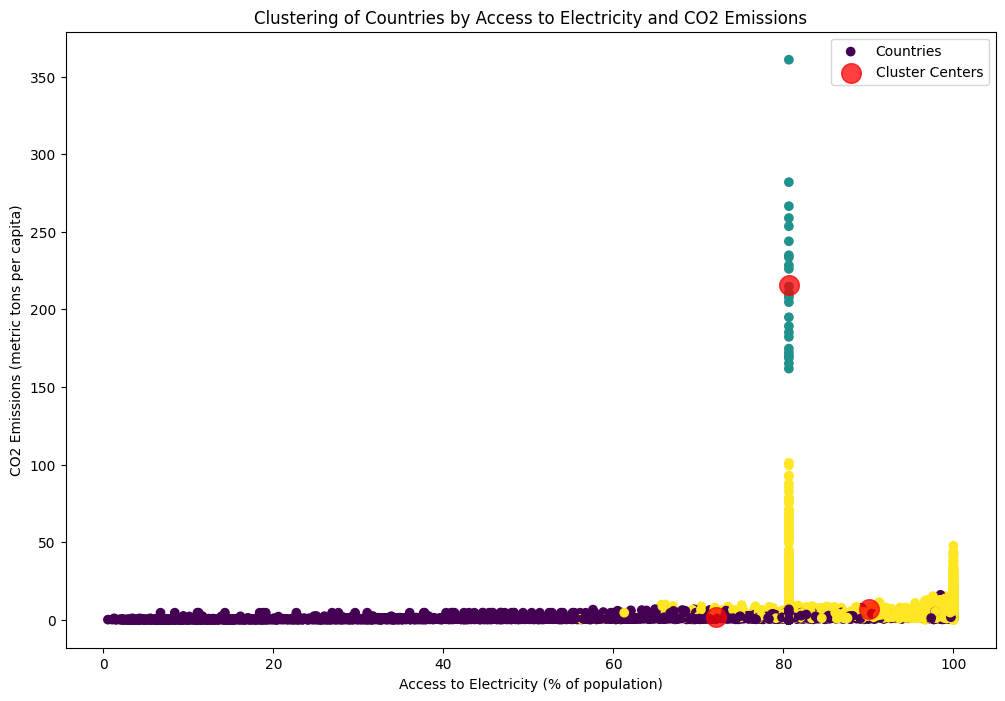

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize the data (excluding country name, code, and year)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_selected.iloc[:, 3:])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
data_selected['Cluster'] = kmeans.labels_

# Add cluster centers to the data
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clusters
plt.figure(figsize=(12, 8))
plt.scatter(data_selected['average_value_Access to electricity (% of population)'],
            data_selected['average_value_CO2 emissions (metric tons per capita)'],
            c=data_selected['Cluster'], cmap='viridis', label='Countries')
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=200, alpha=0.75, label='Cluster Centers')
plt.xlabel('Access to Electricity (% of population)')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.legend()
plt.title('Clustering of Countries by Access to Electricity and CO2 Emissions')
plt.show()


### 2.2 Analyze Clustering Results

In [17]:
# Display the first few rows with cluster labels
data_selected.head()

,Country Name,Country Code,Year,average_value_CO2 emissions (metric tons per capita),average_value_Access to electricity (% of population),average_value_Urban population (% of total population),Cluster
0,Africa Eastern and Southern,AFE,1987,1.390142,80.647826,23.465243,0
1,Albania,ALB,1977,2.275876,80.647826,33.105000,0
2,Albania,ALB,2019,4.508567,100.000000,61.229000,2
3,Armenia,ARM,2020,4.508567,80.647826,63.313000,2
4,Azerbaijan,AZE,2013,3.333404,100.000000,54.145000,2


## 3. Curve Fitting
### 3.1 Fit an Exponential Growth Model

<ipython-input-18-071a90eb356e>:5: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


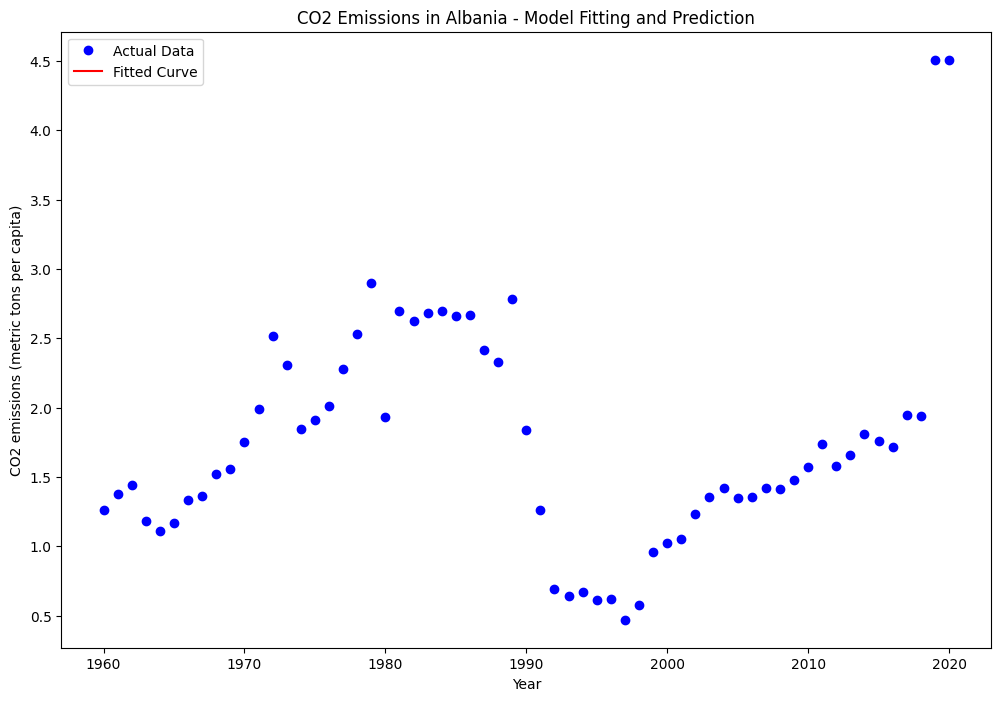

In [18]:
from scipy.optimize import curve_fit

# Define a simple exponential growth model
def exponential_growth(x, a, b):
    return a * np.exp(b * x)

# Select a country to fit the model
country_data = data_selected[data_selected['Country Name'] == 'Albania']

# Fit the model to CO2 emissions over time
years = country_data['Year'].values
co2_emissions = country_data['average_value_CO2 emissions (metric tons per capita)'].values

# Fit the model
params, covariance = curve_fit(exponential_growth, years, co2_emissions)

# Predict future values
future_years = np.arange(2021, 2041)
predicted_emissions = exponential_growth(future_years, *params)

# Plot the fitting results
plt.figure(figsize=(12, 8))
plt.plot(years, co2_emissions, 'bo', label='Actual Data')
plt.plot(future_years, predicted_emissions, 'r-', label='Fitted Curve')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.legend()
plt.title('CO2 Emissions in Albania - Model Fitting and Prediction')
plt.show()


### 3.2 Calculate Confidence Intervals

<ipython-input-18-071a90eb356e>:5: RuntimeWarning: invalid value encountered in multiply
  return a * np.exp(b * x)


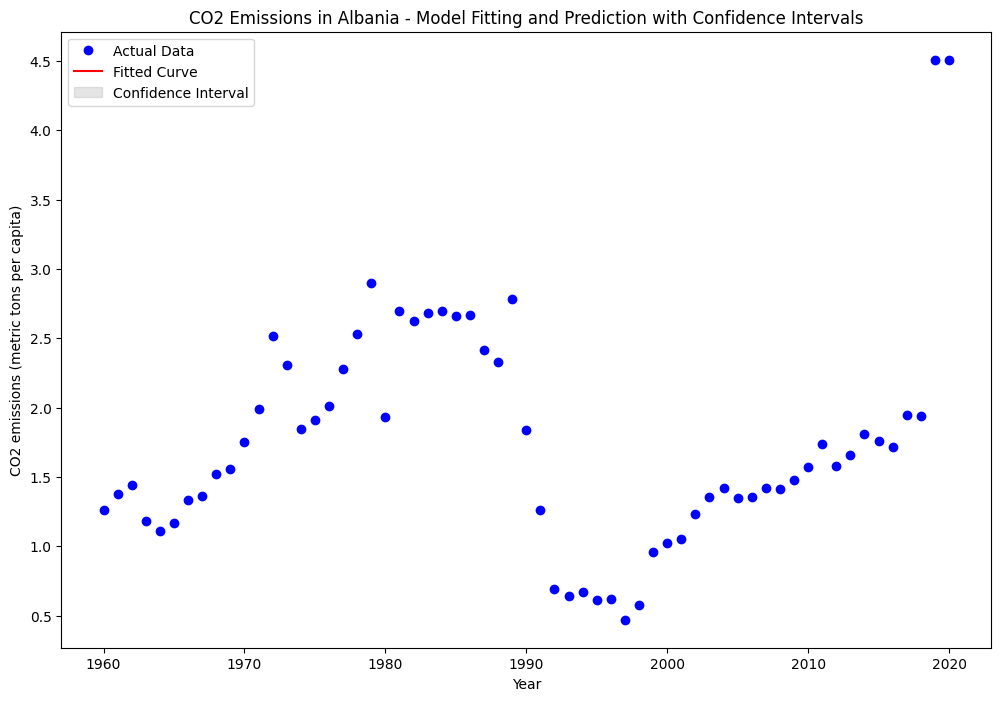

In [19]:
def err_ranges(x, func, param, sigma):
    """
    Calculate the error ranges for a given set of parameters and their covariance matrix.
    """
    import numpy as np

    # Extract parameters and their uncertainties
    a, b = param
    sigma_a, sigma_b = np.sqrt(np.diag(sigma))

    # Define the upper and lower bounds of the confidence intervals
    lower = func(x, a - sigma_a, b - sigma_b)
    upper = func(x, a + sigma_a, b + sigma_b)

    return lower, upper

# Calculate the confidence intervals
lower, upper = err_ranges(future_years, exponential_growth, params, covariance)

# Plot the fitting results with confidence intervals
plt.figure(figsize=(12, 8))
plt.plot(years, co2_emissions, 'bo', label='Actual Data')
plt.plot(future_years, predicted_emissions, 'r-', label='Fitted Curve')
plt.fill_between(future_years, lower, upper, color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.legend()
plt.title('CO2 Emissions in Albania - Model Fitting and Prediction with Confidence Intervals')
plt.show()
